### Домашнее задание № 2 по курсу "Прикладные методы математической статистики"
Баранова Анастасия Андреевна, группа БПИ196

Вариант 1

In [1]:
import numpy as np

#### 1. Рассчитаем 100 псевдослучайных чисел методом серединных квадратов c z1 = 1661.

In [2]:
# Функция возвращает следующий элемент последовательности, генерируемой методом серединных квадратов
def get_next(z):
    return (z ** 2) // 100 % 10000 

In [3]:
# Функция рассчитывает последовательность длины n методом серединных квадратов c заданным z1
def get_sequence(n, z1):
    values = np.array([z1])
    for i in range(1, n):
        values = np.concatenate((values, [get_next(values[i-1])]))
    values = values / 10000
    return values

In [4]:
pseudo_random = get_sequence(100, 1661)

#### 2. Приведем первые 10 чисел этой последовательности.

In [5]:
print(*pseudo_random[0:10], sep=', ')

0.1661, 0.7589, 0.5929, 0.153, 0.3409, 0.6212, 0.5889, 0.6803, 0.2808, 0.8848


#### 3. Построим гистограмму с 10 столбцами для полученной последовательности.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(12,6)})

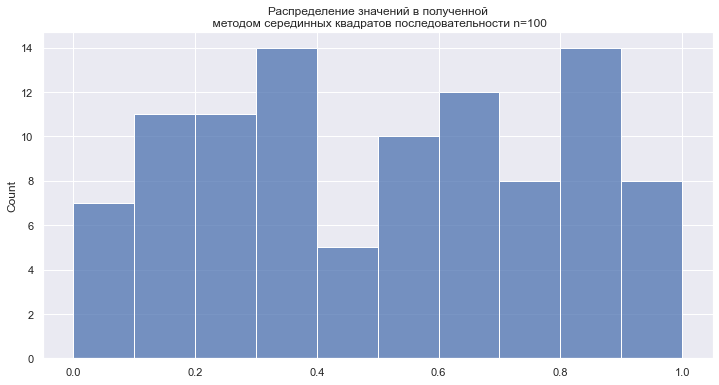

In [7]:
sns.histplot(data=pseudo_random, bins=np.linspace(0,1,11))
plt.title('Распределение значений в полученной\n методом серединных квадратов последовательности n=100')
plt.show()

#### 4. Проверим гипотезу о том, что последовательность имеет распределение R(0, 1) критерием хи-квадрат, разбив интервал [0; 1) на десять равных интервалов.

In [8]:
from scipy.stats import uniform
from scipy.stats import chi2

import pandas as pd

Разобьем интервал [0; 1) на 10 равных интервалов и посчитаем сколько элементов последовательности попадает в каждый из них.

In [9]:
freqs = np.histogram(pseudo_random, bins=np.linspace(0,1,11))

a = np.vectorize(lambda i: str(i)[0:5] + ' - ')(freqs[1][0:10])
columns = np.vectorize(lambda i: a[i] + str(freqs[1][i + 1])[0:5])(range(10))

table = pd.DataFrame(data=[freqs[0]],
                     columns=columns,
                     index=['Наблюдаемая частота'])
table

,0.0 - 0.1,0.1 - 0.2,0.2 - 0.300,0.300 - 0.4,0.4 - 0.5,0.5 - 0.600,0.600 - 0.700,0.700 - 0.8,0.8 - 0.9,0.9 - 1.0
Наблюдаемая частота,7,11,11,14,5,10,12,8,14,8


Вычислим предполагаемую вероятность попадения значения последоваетльности в каждый из интервалов

In [10]:
p = uniform().cdf(freqs[1][1:]) - uniform().cdf(freqs[1][0:10])
p

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

Найдем ожидаемую частоту паподения элементов в каждый из промежутков.

In [11]:
expected = p * pseudo_random.shape[0]
expected

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])

Приведем итоговую таблицу со всеми рассчитаными данными, чтобы наглядно представить разницу между основной гипотезой и данными.

In [12]:
table = pd.DataFrame(data=[p, expected, freqs[0]],
                     columns=columns,
                     index=['Предполагаемая вероятность', 'Ожидаемая частота', 'Наблюдаемая частота'])
table

,0.0 - 0.1,0.1 - 0.2,0.2 - 0.300,0.300 - 0.4,0.4 - 0.5,0.5 - 0.600,0.600 - 0.700,0.700 - 0.8,0.8 - 0.9,0.9 - 1.0
Предполагаемая вероятность,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
Ожидаемая частота,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
Наблюдаемая частота,7.0,11.0,11.0,14.0,5.0,10.0,12.0,8.0,14.0,8.0


Также для наглядности представим различия на графике частот.

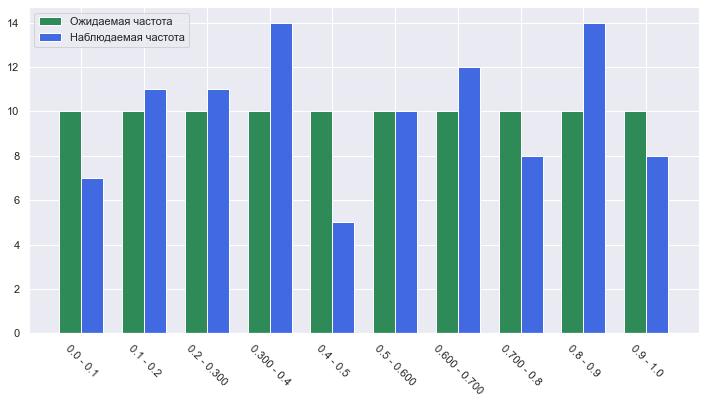

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ind = np.arange(10)
width = 0.35  

rects1 = ax.bar(ind, expected, width, color='seagreen')
rects2 = ax.bar(ind+width, freqs[0], width, color='royalblue')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(columns)
plt.xticks(rotation=-45)

ax.legend( (rects1[0], rects2[0]), ('Ожидаемая частота', 'Наблюдаемая частота') )

plt.show()

Уже на данном этапе можно сказать, что расхождения с равномерным распределением хоть и заметны, но не столь значительны. Сделаем проверку, используя критерий согласия хи-квадрат (критерий согласия Пирсона).

Статистика $\chi^2 = \sum_{j=1}^{k}\frac{(O_j - E_j)^2}{E_j}$ имеет распределение хи-квадрат с k-1 степенями свободы. Здесь $O_j$ - наблюдаемые частоты, $E_j = np_j$ - ожидаемые частоты.

Отвергнем гипотезу, о том, что последовательность имеет распределение R(0, 1), если $\chi^2 > \chi^2_{k-1, \alpha}$ 
где $\alpha$ — уровень значимости. Используем уровень значимости 5%, то есть $\alpha = 0.05$.

In [14]:
chi = ((freqs[0] - expected) ** 2 / expected).sum()
chi

8.0

In [15]:
alpha = 0.05
chi_alpha = chi2.ppf(1-alpha, 9)
chi_alpha

16.918977604620448

In [16]:
if(chi < chi_alpha):
    print('Нет оснований отвергнуть гипотезу')
else:
    print('Гипотеза отвергается')

Нет оснований отвергнуть гипотезу


#### 5. Повторим шаги 3 и 4 для последовательности длиной в 10000 чисел.

In [17]:
pseudo_random = get_sequence(10000, 1661)

Построим гистограмму с 10 столбцами для полученной последовательности.

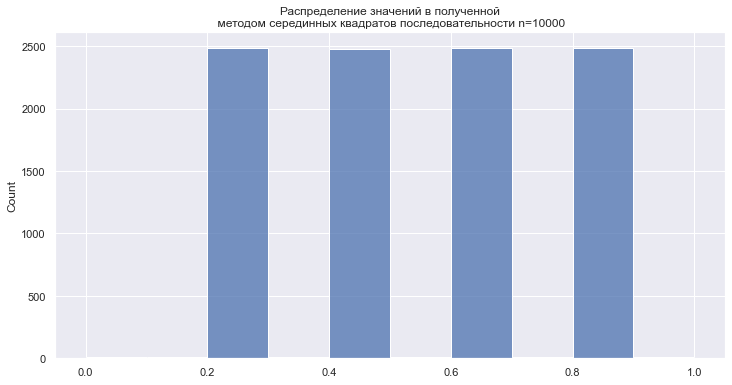

In [18]:
sns.histplot(data=pseudo_random, bins=np.linspace(0,1,11))
plt.title('Распределение значений в полученной\n методом серединных квадратов последовательности n=10000')
plt.show()

Проверим гипотезу о том, что последовательность имеет распределение R(0, 1) критерием хи-квадрат, разбив интервал [0; 1) на десять равных интервалов.

Разобьем интервал [0; 1) на 10 равных интервалов и посчитаем сколько элементов последовательности попадает в каждый из них.

In [19]:
freqs = np.histogram(pseudo_random, bins=np.linspace(0,1,11))

Вычислим предполагаемую вероятность попадения значения последоваетльности в каждый из интервалов.

In [20]:
p = uniform().cdf(freqs[1][1:]) - uniform().cdf(freqs[1][0:10])

Найдем ожидаемую частоту попадения элементов в каждый из интервалов.

In [21]:
expected = p * pseudo_random.shape[0]

Приведем итоговую таблицу со всеми рассчитаными данными, чтобы наглядно представить разницу между основной гипотезой и данными.

In [22]:
a = np.vectorize(lambda i: str(i)[0:5] + ' - ')(freqs[1][0:10])
columns = np.vectorize(lambda i: a[i] + str(freqs[1][i + 1])[0:5])(range(10))
table = pd.DataFrame(data=[p, expected, freqs[0]],
                     columns=columns,
                     index=['Предполагаемая вероятность', 'Ожидаемая частота', 'Наблюдаемая частота'])
table

,0.0 - 0.1,0.1 - 0.2,0.2 - 0.300,0.300 - 0.4,0.4 - 0.5,0.5 - 0.600,0.600 - 0.700,0.700 - 0.8,0.8 - 0.9,0.9 - 1.0
Предполагаемая вероятность,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
Ожидаемая частота,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
Наблюдаемая частота,7.0,11.0,2487.0,14.0,2480.0,10.0,2486.0,8.0,2489.0,8.0


Также для наглядности представим различия на графике частот.

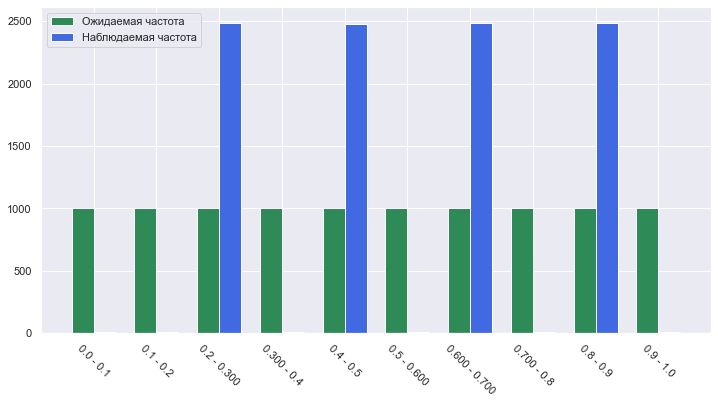

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ind = np.arange(10)
width = 0.35  

rects1 = ax.bar(ind, expected, width, color='seagreen')
rects2 = ax.bar(ind+width, freqs[0], width, color='royalblue')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(columns)
plt.xticks(rotation=-45)

ax.legend( (rects1[0], rects2[0]), ('Ожидаемая частота', 'Наблюдаемая частота') )

plt.show()

Здесь различия уже гораздо более ярко выражены. Сделаем проверку, используя критерий согласия хи-квадрат (критерий согласия Пирсона).

Случайная величина $\chi^2 = \sum_{j=1}^{k}\frac{(O_j - E_j)^2}{E_j}$ имеет распределение хи-квадрат с k-1 степенями свободы. Здесь $O_j$ - наблюдаемые частоты, $E_j = np_j$ - ожидаемые частоты.

Отвергнем гипотезу, о том, что последовательность имеет распределение R(0, 1), если $\chi^2 > \chi^2_{k-1, \alpha}$ 
где $\alpha$ — уровень значимости. Используем уровень значимости 5%, то есть $\alpha = 0.05$.

In [24]:
chi = ((freqs[0] - expected) ** 2 / expected).sum()
chi

14711.480000000001

In [25]:
alpha = 0.05
chi_alpha = chi2.ppf(1-alpha, 9)
chi_alpha

16.918977604620448

In [26]:
if(chi < chi_alpha):
    print('Нет оснований отвергнуть гипотезу')
else:
    print('Гипотеза отвергается')

Гипотеза отвергается


#### 6. Используем тест перестановок и проверим этим тестом первые 9999 чисел вашей последовательности, разбив их на тройки.

Разделим первые 9999 чисел последовательности на тройки.

In [27]:
triplets = np.array_split(pseudo_random[:9999], 3333)

Построим перестановки по каждой из полученных троек.

In [28]:
# Для данного элемента тройки возвращет соответствующее ему число в перестановке
def get_val(arr, i):
    return 1 if arr[i] == arr.min() else 3 if arr[i] == arr.max() else 2

In [29]:
# Для данной тройки возвращет соответствующую ей перестановку
def get_permutation(arr):
    return [get_val(arr, 0), get_val(arr, 1), get_val(arr, 2)]

In [30]:
permutations = np.apply_along_axis(func1d=lambda arr: get_permutation(arr), axis=1, arr=triplets)

Рассчитаем частоту каждой из шести перестановок в тестируемой последовательности.

In [31]:
unique, count = np.unique(permutations, return_counts=True, axis=0)

Применим критерий согласия хи-квадрат для проверки гипотезы о равновероятности этих перестановок.

In [32]:
expected = [1/6 * count.sum()] * 6

In [33]:
columns=np.apply_along_axis(lambda i: '(' + ', '.join(map(str, i)) + ')', 1, unique)

table = pd.DataFrame(data=[[1/6] * 6, expected, count],
                     columns=columns,
                     index=['Предполагаемая вероятность', 'Ожидаемая частота', 'Наблюдаемая частота'])

table

,"(1, 2, 3)","(1, 3, 2)","(2, 1, 3)","(2, 3, 1)","(3, 1, 2)","(3, 2, 1)"
Предполагаемая вероятность,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
Ожидаемая частота,555.500000,555.500000,555.500000,555.500000,555.500000,555.500000
Наблюдаемая частота,833.000000,832.000000,6.000000,3.000000,829.000000,830.000000


Также для наглядности представим различия на графике частот.

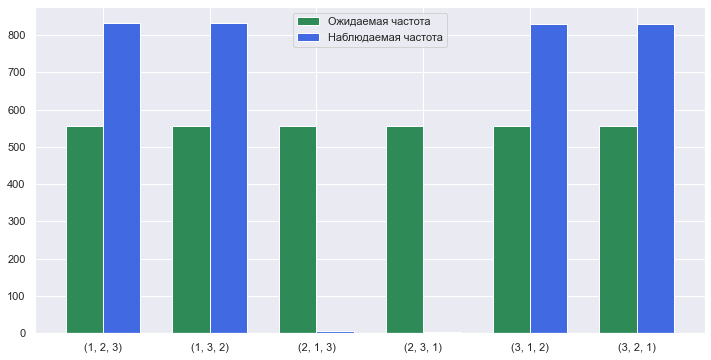

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
ind = np.arange(6)
width = 0.35  

rects1 = ax.bar(ind, expected, width, color='seagreen')
rects2 = ax.bar(ind+width, count, width, color='royalblue')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(columns)

ax.legend( (rects1[0], rects2[0]), ('Ожидаемая частота', 'Наблюдаемая частота') )

plt.show()

In [35]:
chi = ((count - expected) ** 2 / expected).sum()
chi

1639.6354635463545

In [36]:
alpha = 0.05
chi_alpha = chi2.ppf(1-alpha, 5)
chi_alpha

11.070497693516351

In [37]:
if(chi < chi_alpha):
    print('Нет оснований отвергнуть гипотезу')
else:
    print('Гипотеза отвергается')

Гипотеза отвергается
